In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
wegmansLGBMData = mydir + "2019and2020pred_30daywindow_lgbm.csv"
wegmansLGBM = pd.read_csv(wegmansLGBMData)

In [4]:
wegmansLGBM

,Unnamed: 0,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,Prediction
0,439,2019-01-07,ASIAN,ASIAN HOT,1.43,1.43,0.00,False,14,37.0
1,440,2019-01-07,ASIAN,ASIAN PACKAGED,41.76,91.42,0.00,False,15,37.0
2,441,2019-01-07,BAKESHOP,BAGELS,12.70,117.27,0.00,False,23,37.0
3,442,2019-01-07,BAKESHOP,BAKESHOP COOKIES,35.63,39.06,0.00,False,26,28.0
4,443,2019-01-07,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,19.35,56.65,0.00,False,27,28.0
...,...,...,...,...,...,...,...,...,...,...
300201,300640,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,6.47,12.94,11.50,False,488,2.0
300202,300641,2020-12-31,SUSHI,VEGGIE SUSHI,16.52,25.15,25.14,False,557,3.0
300203,300642,2020-12-31,ULTIMATE COFFEE,BREAKFAST,6.46,3.23,3.23,False,52,2.0
300204,300643,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2.12,1.69,4.60,False,112,2.0


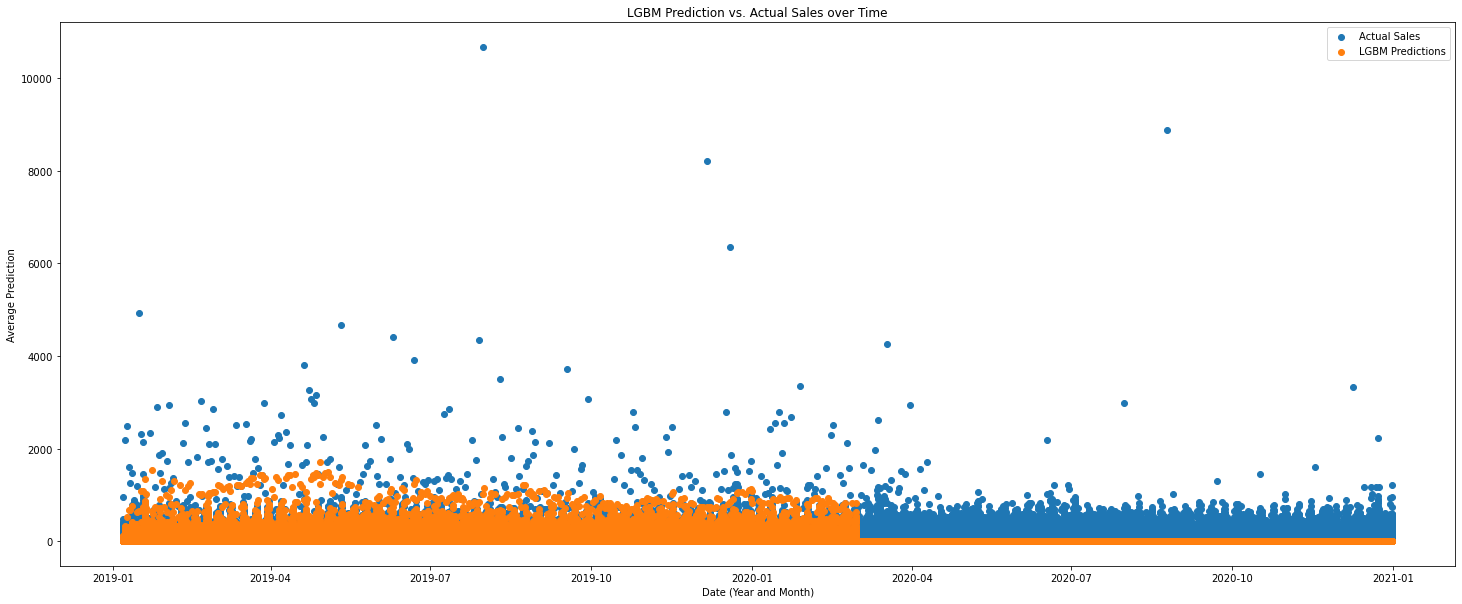

In [60]:
wegmansLGBM["DATE_KEY"] =  pd.to_datetime(wegmansLGBM["DATE_KEY"])
x_date = wegmansLGBM['DATE_KEY']
y = wegmansLGBM['SALES']

x_datepred = wegmansLGBM['DATE_KEY']
y_pred = wegmansLGBM['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred,y_pred)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

In [54]:
wegmansLGBM_digital = wegmansLGBM[(wegmansLGBM["DEPARTMENT_NAME"] == 'DIGITAL FULFILLMENT')]

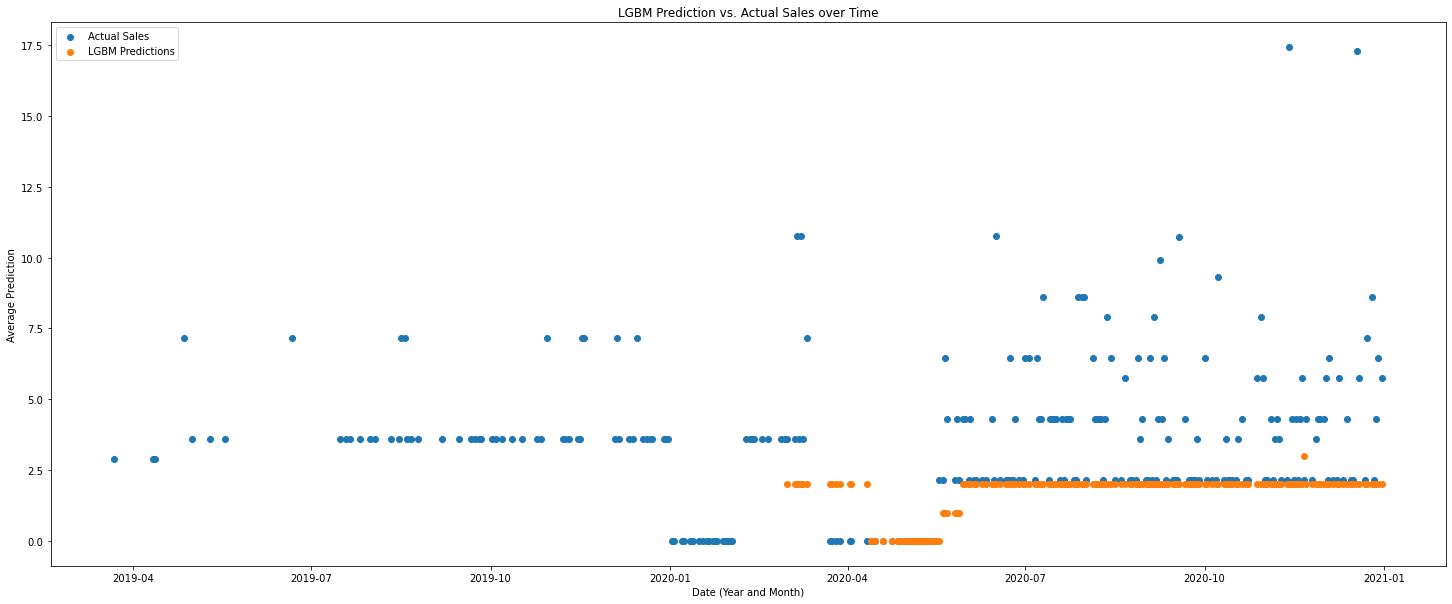

In [59]:
x_date = wegmansLGBM_digital['DATE_KEY']
y = wegmansLGBM_digital['SALES']

x_datepred = wegmansLGBM_digital.loc[wegmansLGBM.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred = wegmansLGBM_digital.loc[wegmansLGBM.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred,y_pred)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

In [61]:
wegmansLGBM_rx = wegmansLGBM[(wegmansLGBM["DEPARTMENT_NAME"] == 'PHARMACY RX')]

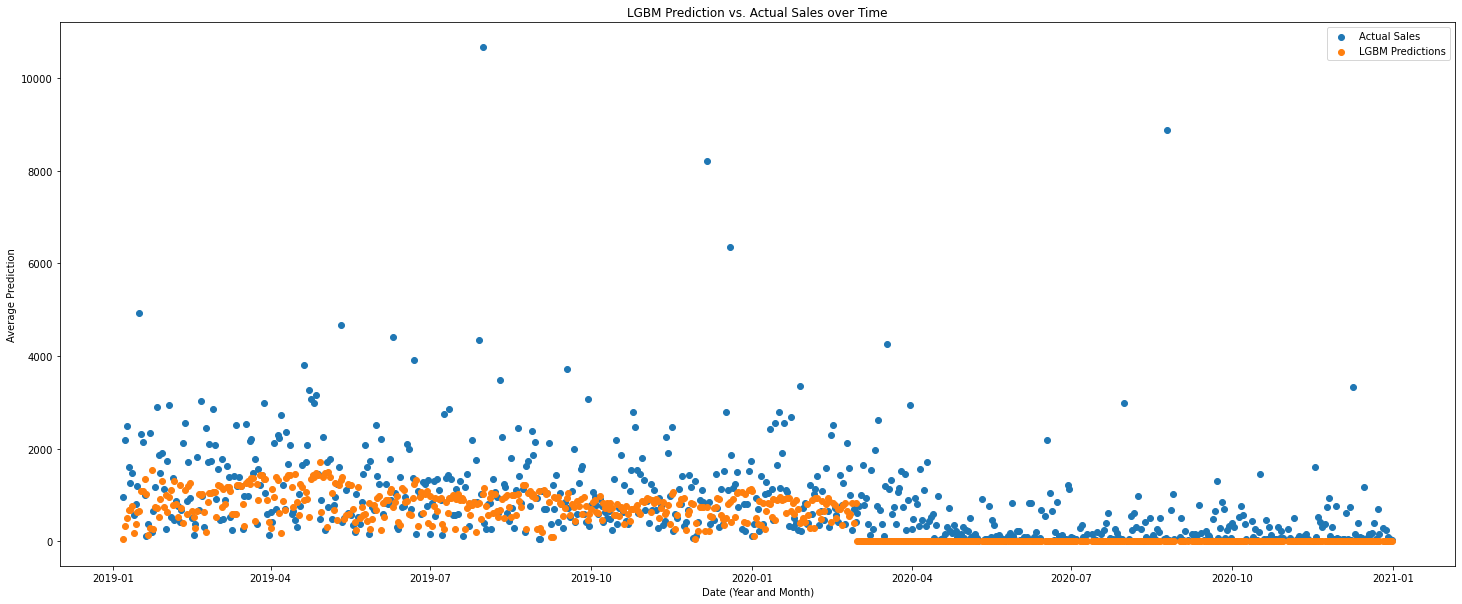

In [63]:
x_date = wegmansLGBM_rx['DATE_KEY']
y = wegmansLGBM_rx['SALES']

x_datepred_rx = wegmansLGBM_rx['DATE_KEY']
y_pred_rx = wegmansLGBM_rx['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred_rx,y_pred_rx)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

In [64]:
wegmansLGBM_wegmansbrand = wegmansLGBM[(wegmansLGBM["DEPARTMENT_NAME"] == 'WBRAND & OTHER')]

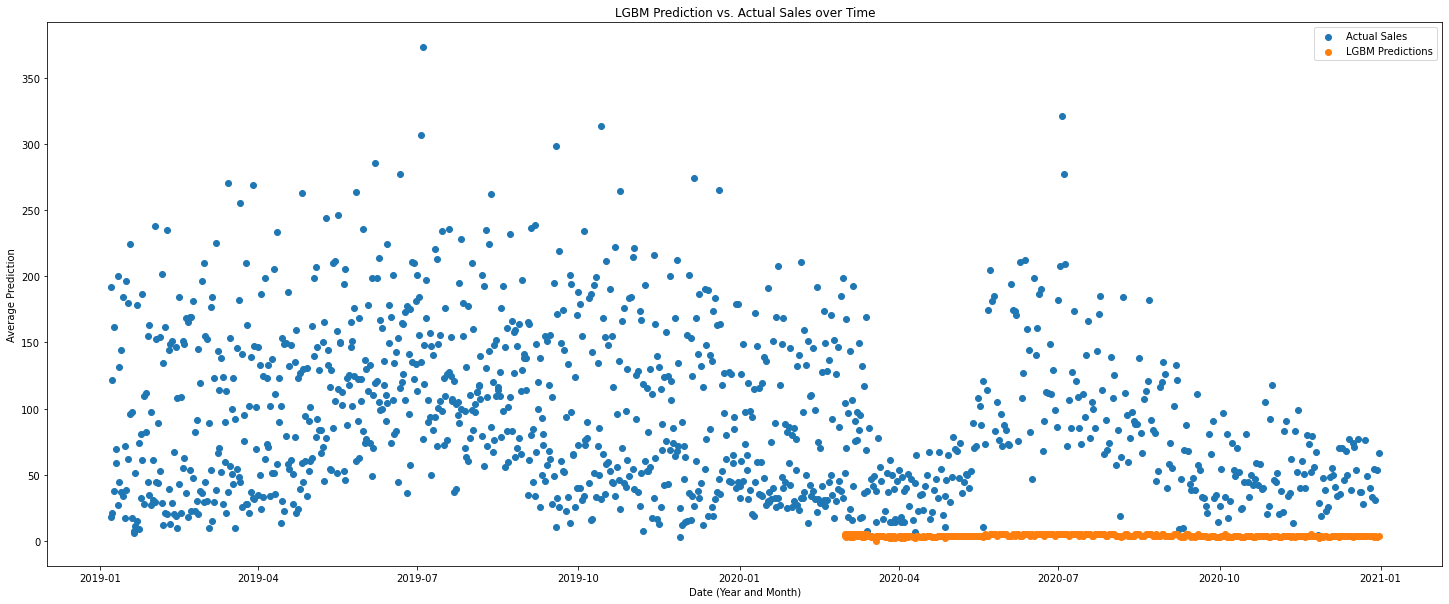

In [65]:
x_date = wegmansLGBM_wegmansbrand['DATE_KEY']
y = wegmansLGBM_wegmansbrand['SALES']

x_datepred = wegmansLGBM_wegmansbrand.loc[wegmansLGBM_wegmansbrand.DATE_KEY >= '3/1/2020']['DATE_KEY']
y_pred = wegmansLGBM_wegmansbrand.loc[wegmansLGBM_wegmansbrand.DATE_KEY >= '3/1/2020']['Prediction']

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred,y_pred)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

In [18]:
wegmansLGBM['Prediction']

0         37.0
1         37.0
2         37.0
3         28.0
4         28.0
          ... 
300201     2.0
300202     3.0
300203     2.0
300204     2.0
300205     4.0
Name: Prediction, Length: 300206, dtype: float64

In [20]:
prediction

Index(['Unnamed: 0', 'DATE_KEY', 'DEPARTMENT_NAME', 'CATEGORY_NAME', 'SALES',
       'Yesterday Sales', 'Week Ago Sales', 'sWeek', 'CATCODES', ''],
      dtype='object')

In [37]:
wegmansLGBM.groupby('DATE_KEY')['Prediction'].mean()

DATE_KEY
2019-01-07    35.307692
2019-01-08    30.487437
2019-01-09    28.190594
2019-01-10    39.148936
2019-01-11    27.124706
                ...    
2020-12-27     3.530713
2020-12-28     3.417284
2020-12-29     3.260563
2020-12-30     3.296380
2020-12-31     3.533632
Name: Prediction, Length: 723, dtype: float64

In [17]:
wegmansLGBM["DATE_KEY"] =  pd.to_datetime(wegmansLGBM["DATE_KEY"])
x_date = wegmansLGBM['DATE_KEY'].value_counts().index
y = wegmansLGBM.groupby('DATE_KEY')['SALES'].mean()

x_datepred = wegmansLGBM['DATE_KEY'].value_counts().index
y_pred = wegmansLGBM.groupby('DATE_KEY')['Prediction'].value()

plt.figure(figsize=(25, 10))
plt.scatter(x_date,y)
plt.scatter(x_datepred,y_pred)

plt.title("LGBM Prediction vs. Actual Sales over Time")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Average Prediction")

plt.legend(["Actual Sales", "LGBM Predictions"])

plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'value'

In [10]:
wegmansLGBM.head(50)

,Unnamed: 0,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,Prediction
0,439,2019-01-07,ASIAN,ASIAN HOT,1.43,1.43,0.0,False,14,37.0
1,440,2019-01-07,ASIAN,ASIAN PACKAGED,41.76,91.42,0.0,False,15,37.0
2,441,2019-01-07,BAKESHOP,BAGELS,12.70,117.27,0.0,False,23,37.0
3,442,2019-01-07,BAKESHOP,BAKESHOP COOKIES,35.63,39.06,0.0,False,26,28.0
4,443,2019-01-07,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,19.35,56.65,0.0,False,27,28.0
5,444,2019-01-07,BAKESHOP,BROWNIES,6.12,7.74,0.0,False,56,25.0
6,445,2019-01-07,BAKESHOP,GLUTEN FREE,4.31,12.79,0.0,False,234,12.0
7,446,2019-01-07,BAKESHOP,KOSHER BAKERY PRODUCTS,4.31,4.31,0.0,False,310,10.0
8,447,2019-01-07,BAKESHOP,MISCELLANEOUS COMMERCIAL BAKER,8.62,17.41,0.0,False,349,14.0
9,448,2019-01-07,BAKESHOP,ORGANIC BREADS,8.64,48.96,0.0,False,373,52.0


In [9]:
wegmansLGBM[wegmansLGBM['DATE_KEY'] >= '3/1/2020']

,Unnamed: 0,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Yesterday Sales,Week Ago Sales,isWeekend,CATCODES,Prediction
175022,175461,2020-03-01,ASIAN,ASIAN PACKAGED,52.56,16.56,49.50,True,15,3.0
175023,175462,2020-03-01,BAKESHOP,BAGELS,19.53,65.01,2.15,True,23,3.0
175024,175463,2020-03-01,BAKESHOP,BAKESHOP COOKIES,64.80,51.30,46.80,True,26,4.0
175025,175464,2020-03-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,35.85,34.40,40.15,True,27,4.0
175026,175465,2020-03-01,BAKESHOP,BROWNIES,16.02,11.88,6.66,True,56,3.0
...,...,...,...,...,...,...,...,...,...,...
300201,300640,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,6.47,12.94,11.50,False,488,2.0
300202,300641,2020-12-31,SUSHI,VEGGIE SUSHI,16.52,25.15,25.14,False,557,3.0
300203,300642,2020-12-31,ULTIMATE COFFEE,BREAKFAST,6.46,3.23,3.23,False,52,2.0
300204,300643,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2.12,1.69,4.60,False,112,2.0
